<a href="https://colab.research.google.com/github/harryge/DSprojects/blob/main/Linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
x=[1,2,3]
x1=[2,3,4]

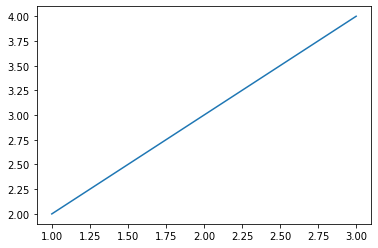

In [12]:
plt.plot(x,x1)

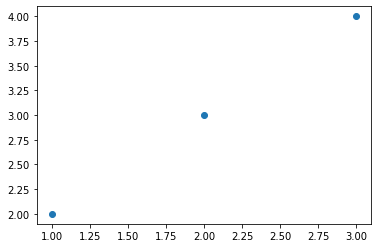

In [13]:
plt.scatter(x,x1)

In [7]:
list(reversed(range(1,11)))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [14]:
## Download in the data if it's not already there
! if [ ! -e oasis.csv ];\
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv; \
  fi;


--2022-05-13 16:00:40--  https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/oasis.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22274 (22K) [text/plain]
Saving to: ‘oasis.csv’

oasis.csv           100%[===================>]  21.75K  --.-KB/s    in 0s      

2022-05-13 16:00:40 (121 MB/s) - ‘oasis.csv’ saved [22274/22274]



In [16]:
df=pd.read_csv('oasis.csv')
df.head()

,FLAIR,PD,T1,T2,FLAIR_10,PD_10,T1_10,T2_10,FLAIR_20,PD_20,T1_20,T2_20,GOLD_Lesions
0,1.143692,1.586219,-0.799859,1.634467,0.437568,0.823800,-0.002059,0.573663,0.279832,0.548341,0.219136,0.298662,0
1,1.652552,1.766672,-1.250992,0.921230,0.663037,0.880250,-0.422060,0.542597,0.422182,0.549711,0.061573,0.280972,0
2,1.036099,0.262042,-0.858565,-0.058211,-0.044280,-0.308569,0.014766,-0.256075,-0.136532,-0.350905,0.020673,-0.259914,0
3,1.037692,0.011104,-1.228796,-0.470222,-0.013971,-0.000498,-0.395575,-0.221900,0.000807,-0.003085,-0.193249,-0.139284,0
4,1.580589,1.730152,-0.860949,1.245609,0.617957,0.866352,-0.099919,0.384261,0.391133,0.608826,0.071648,0.340601,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FLAIR         100 non-null    float64
 1   PD            100 non-null    float64
 2   T1            100 non-null    float64
 3   T2            100 non-null    float64
 4   FLAIR_10      100 non-null    float64
 5   PD_10         100 non-null    float64
 6   T1_10         100 non-null    float64
 7   T2_10         100 non-null    float64
 8   FLAIR_20      100 non-null    float64
 9   PD_20         100 non-null    float64
 10  T1_20         100 non-null    float64
 11  T2_20         100 non-null    float64
 12  GOLD_Lesions  100 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [32]:
df.shape

(100, 13)

In [17]:
df.sum()

FLAIR           168.456616
PD               71.519184
T1              -11.664112
T2               51.258106
FLAIR_10         28.931931
PD_10            16.371878
T1_10            19.040562
T2_10             7.988649
FLAIR_20         10.777859
PD_20             7.489596
T1_20            14.608440
T2_20             2.251235
GOLD_Lesions     50.000000
dtype: float64

In [18]:
df.mean()

FLAIR           1.684566
PD              0.715192
T1             -0.116641
T2              0.512581
FLAIR_10        0.289319
PD_10           0.163719
T1_10           0.190406
T2_10           0.079886
FLAIR_20        0.107779
PD_20           0.074896
T1_20           0.146084
T2_20           0.022512
GOLD_Lesions    0.500000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'A scatter plot of PD against T2')

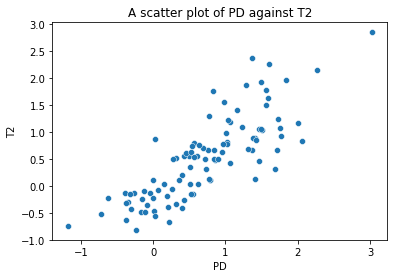

In [22]:
sns.scatterplot(df['PD'],df['T2'])
plt.title('A scatter plot of PD against T2')

In [29]:
#fitting an ols model
model=smf.ols('PD~T2',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PD   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     190.9
Date:                Fri, 13 May 2022   Prob (F-statistic):           9.77e-25
Time:                        16:19:43   Log-Likelihood:                -57.347
No. Observations:                 100   AIC:                             118.7
Df Residuals:                      98   BIC:                             123.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3138      0.052      6.010      0.000       0.210       0.417
T2             0.7832      0.057     13.815      0.000       0.671       0.896
==============================================================================
Omnibus:                        1.171   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.972
Skew:                           0.241   Prob(JB):                        0.615
Kurtosis:                       2.995   Cond. No.                         1.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

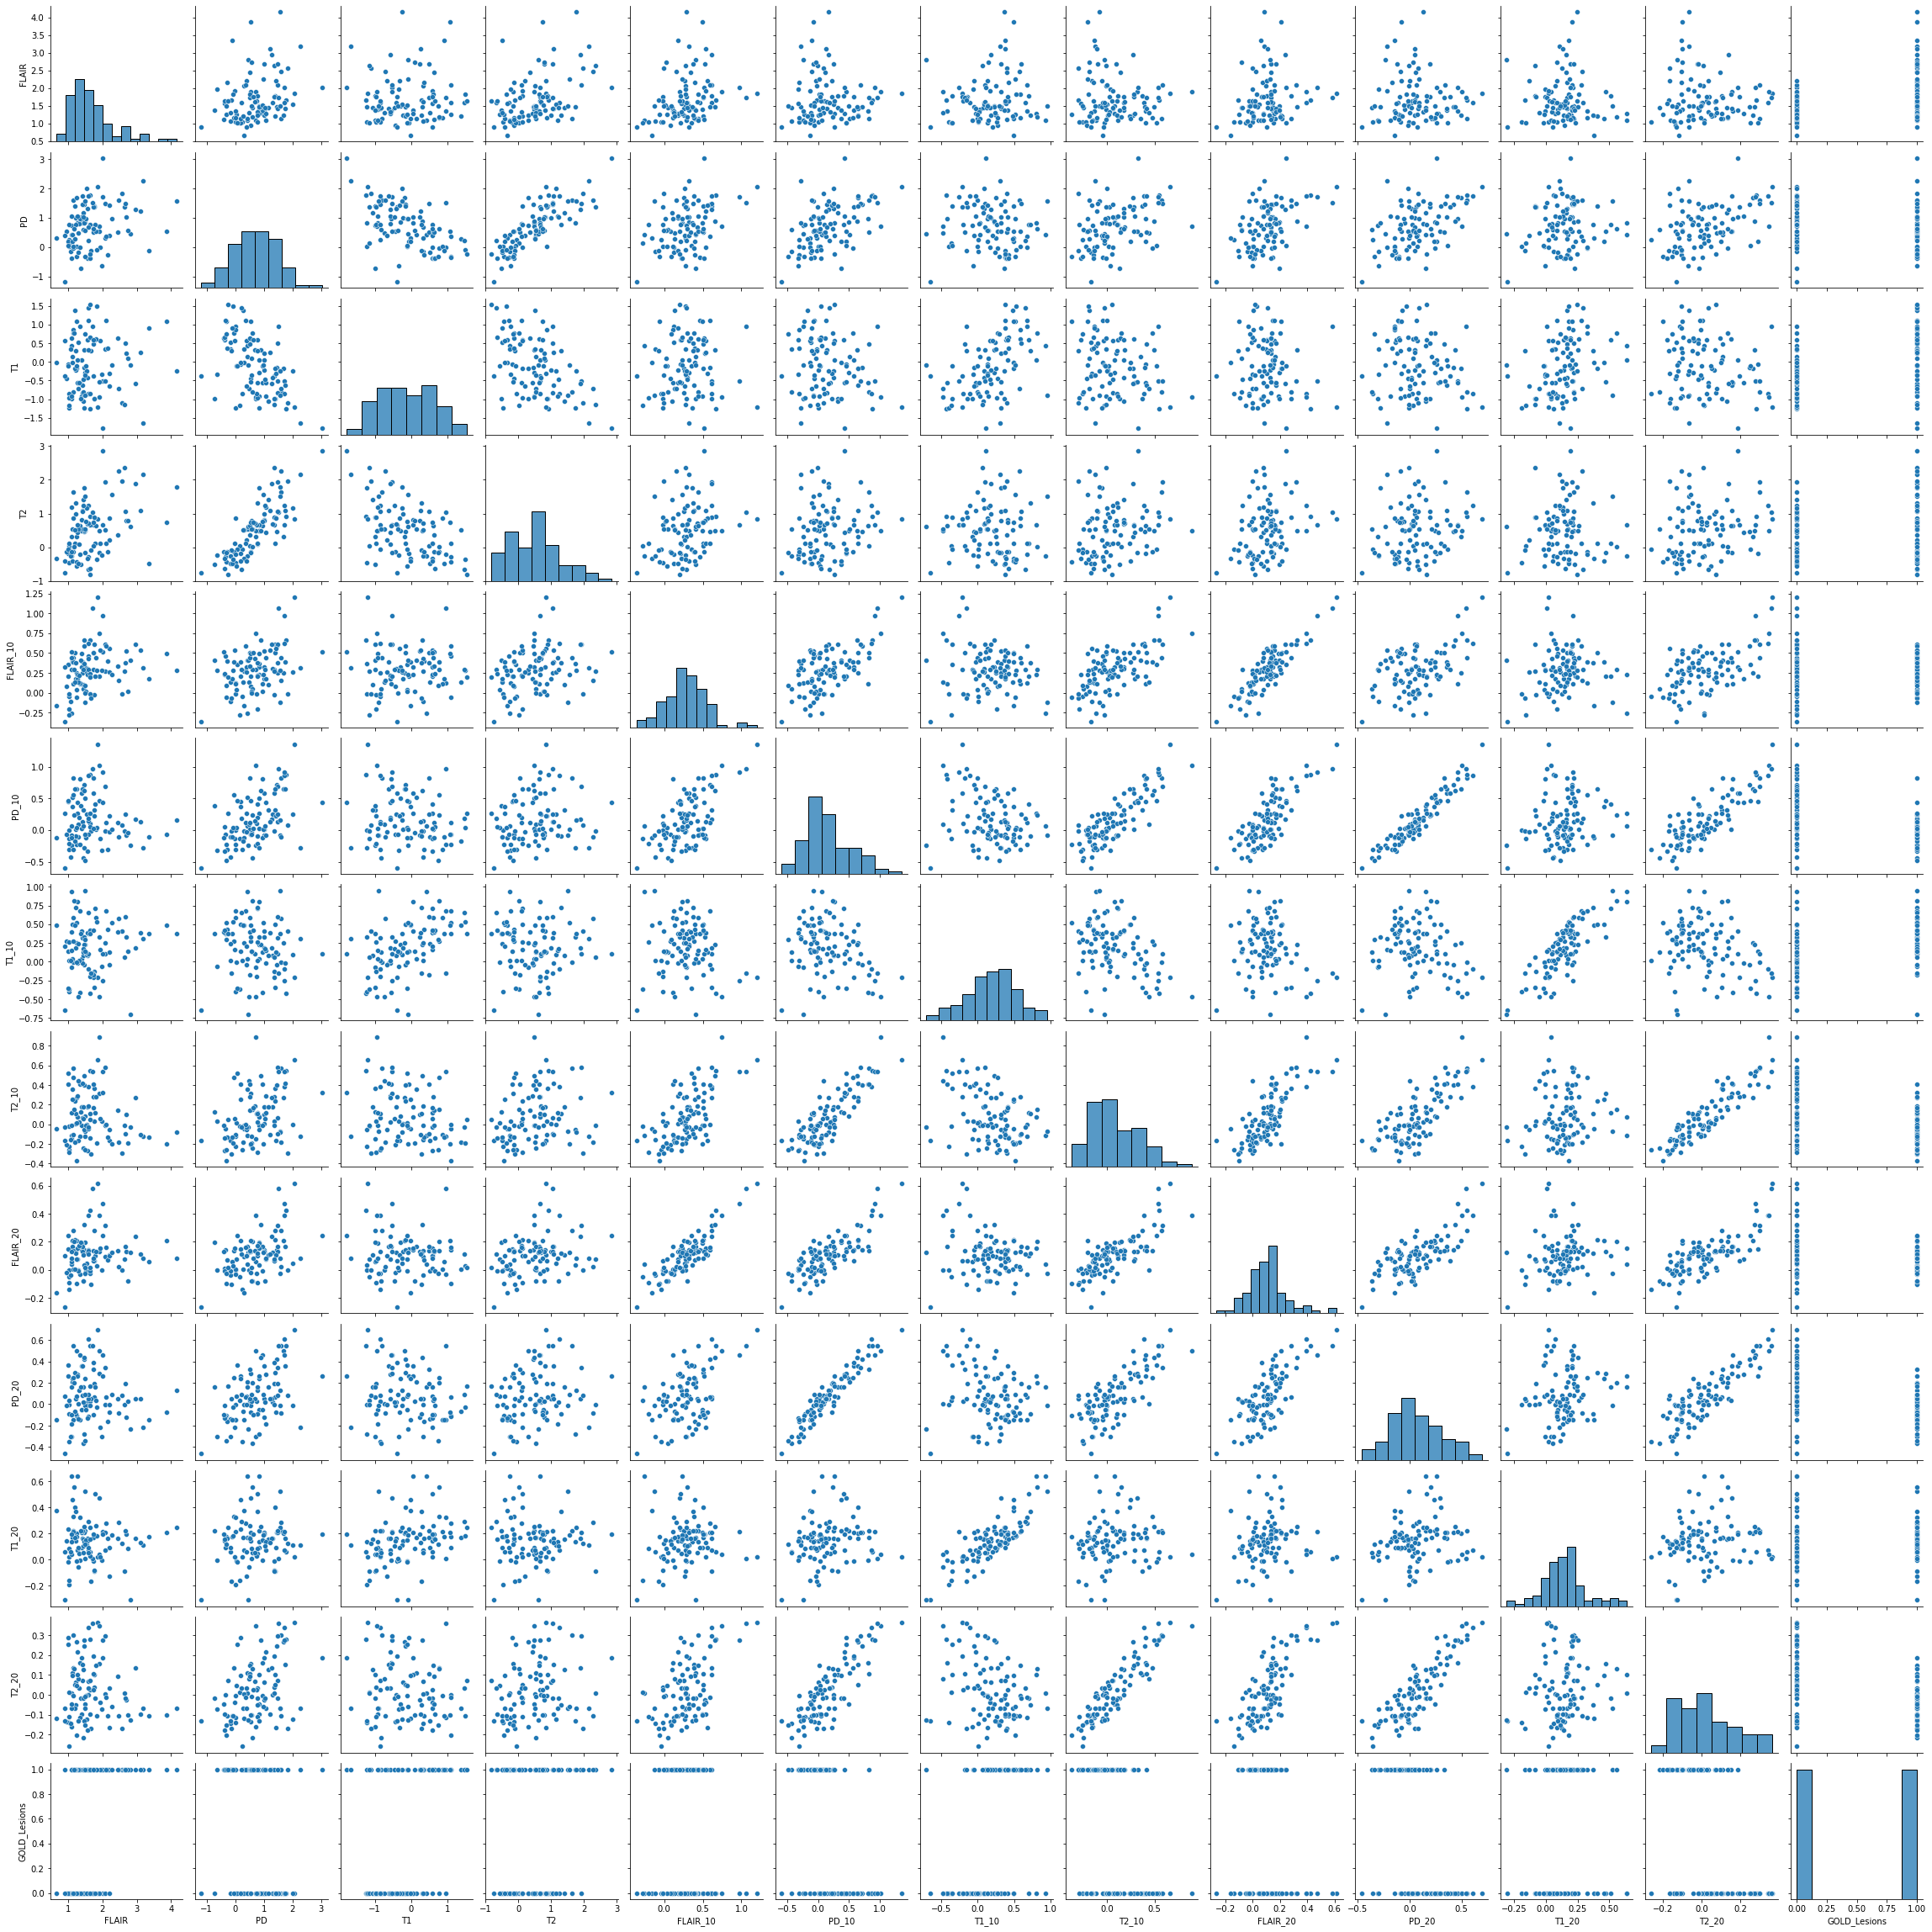

In [33]:
sns.pairplot(df, kind="scatter")
plt.show()
